In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow_hub as hub # for accessing our ML model from tensorflow hub
import glob
import shutil
import os
import seaborn as sns
import time
import dataframe_image as dfi

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,0,p1.JPG,167996,{},12,0,"{""name"":""rect"",""x"":70,""y"":46,""width"":120,""heig...","{""type"":""intact""}"
1,1,p1.JPG,167996,{},12,1,"{""name"":""rect"",""x"":195,""y"":60,""width"":118,""hei...","{""type"":""intact""}"
2,2,p1.JPG,167996,{},12,2,"{""name"":""rect"",""x"":318,""y"":25,""width"":144,""hei...","{""type"":""damaged""}"
3,3,p1.JPG,167996,{},12,3,"{""name"":""rect"",""x"":474,""y"":13,""width"":135,""hei...","{""type"":""intact""}"
4,4,p1.JPG,167996,{},12,4,"{""name"":""rect"",""x"":45,""y"":162,""width"":123,""hei...","{""type"":""intact""}"


In [3]:
df.drop(['Unnamed: 0','file_size','file_attributes'],axis=1,inplace=True)
df

,filename,region_count,region_id,region_shape_attributes,region_attributes
0,p1.JPG,12,0,"{""name"":""rect"",""x"":70,""y"":46,""width"":120,""heig...","{""type"":""intact""}"
1,p1.JPG,12,1,"{""name"":""rect"",""x"":195,""y"":60,""width"":118,""hei...","{""type"":""intact""}"
2,p1.JPG,12,2,"{""name"":""rect"",""x"":318,""y"":25,""width"":144,""hei...","{""type"":""damaged""}"
3,p1.JPG,12,3,"{""name"":""rect"",""x"":474,""y"":13,""width"":135,""hei...","{""type"":""intact""}"
4,p1.JPG,12,4,"{""name"":""rect"",""x"":45,""y"":162,""width"":123,""hei...","{""type"":""intact""}"
...,...,...,...,...,...
1854,t1.JPG,6,1,"{""name"":""rect"",""x"":232,""y"":34,""width"":147,""hei...","{""type"":""intact""}"
1855,t1.JPG,6,2,"{""name"":""rect"",""x"":451,""y"":89,""width"":124,""hei...","{""type"":""intact""}"
1856,t1.JPG,6,3,"{""name"":""rect"",""x"":80,""y"":248,""width"":138,""hei...","{""type"":""damaged""}"
1857,t1.JPG,6,4,"{""name"":""rect"",""x"":244,""y"":284,""width"":146,""he...","{""type"":""intact""}"


In [4]:
df['damage'] = 0
df.loc[df['region_attributes']=='{"type":"damaged"}','damage'] = 1
df.drop('region_attributes',axis=1,inplace=True)

In [5]:
x = []
y = []
h = []
w = []
def image_extract():
    for idx, row in df['region_shape_attributes'].iteritems():
        row = eval(row)
        l = row.keys()
        if 'x' in l:
            x.append(row['x'])
        if 'y' in l:
            y.append(row['y'])
        if 'width' in l:
            w.append(row['width'])
        if 'height' in l:
            h.append(row['height'])
    df['x'] = x
    df['y'] = y
    df['h'] = h
    df['w'] = w
    for idx, row in df['filename'].iteritems():
        img = cv2.imread('archive/'+row)
        img_each = img[df['y'][idx]:df['y'][idx] + df['h'][idx], df['x'][idx]:df['x'][idx] + df['w'][idx]]
        cv2.imwrite('each/img' + str(idx) + '.jpg',img_each)
    return df

In [6]:
df = image_extract()
df

C:\Users\Ritvik\AppData\Local\Temp\ipykernel_23252\644983954.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in df['region_shape_attributes'].iteritems():
C:\Users\Ritvik\AppData\Local\Temp\ipykernel_23252\644983954.py:21: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in df['filename'].iteritems():


,filename,region_count,region_id,region_shape_attributes,damage,x,y,h,w
0,p1.JPG,12,0,"{""name"":""rect"",""x"":70,""y"":46,""width"":120,""heig...",0,70,46,112,120
1,p1.JPG,12,1,"{""name"":""rect"",""x"":195,""y"":60,""width"":118,""hei...",0,195,60,99,118
2,p1.JPG,12,2,"{""name"":""rect"",""x"":318,""y"":25,""width"":144,""hei...",1,318,25,120,144
3,p1.JPG,12,3,"{""name"":""rect"",""x"":474,""y"":13,""width"":135,""hei...",0,474,13,122,135
4,p1.JPG,12,4,"{""name"":""rect"",""x"":45,""y"":162,""width"":123,""hei...",0,45,162,116,123
...,...,...,...,...,...,...,...,...,...
1854,t1.JPG,6,1,"{""name"":""rect"",""x"":232,""y"":34,""width"":147,""hei...",0,232,34,146,147
1855,t1.JPG,6,2,"{""name"":""rect"",""x"":451,""y"":89,""width"":124,""hei...",0,451,89,126,124
1856,t1.JPG,6,3,"{""name"":""rect"",""x"":80,""y"":248,""width"":138,""hei...",1,80,248,138,138
1857,t1.JPG,6,4,"{""name"":""rect"",""x"":244,""y"":284,""width"":146,""he...",0,244,284,150,146


In [7]:
df.drop('region_shape_attributes',axis=1,inplace=True)
df

,filename,region_count,region_id,damage,x,y,h,w
0,p1.JPG,12,0,0,70,46,112,120
1,p1.JPG,12,1,0,195,60,99,118
2,p1.JPG,12,2,1,318,25,120,144
3,p1.JPG,12,3,0,474,13,122,135
4,p1.JPG,12,4,0,45,162,116,123
...,...,...,...,...,...,...,...,...
1854,t1.JPG,6,1,0,232,34,146,147
1855,t1.JPG,6,2,0,451,89,126,124
1856,t1.JPG,6,3,1,80,248,138,138
1857,t1.JPG,6,4,0,244,284,150,146


In [8]:
np.sum(df.damage == 0)

962

In [9]:
np.sum(df.damage == 1)

897

In [10]:
df.reset_index(inplace=True)
df

,index,filename,region_count,region_id,damage,x,y,h,w
0,0,p1.JPG,12,0,0,70,46,112,120
1,1,p1.JPG,12,1,0,195,60,99,118
2,2,p1.JPG,12,2,1,318,25,120,144
3,3,p1.JPG,12,3,0,474,13,122,135
4,4,p1.JPG,12,4,0,45,162,116,123
...,...,...,...,...,...,...,...,...,...
1854,1854,t1.JPG,6,1,0,232,34,146,147
1855,1855,t1.JPG,6,2,0,451,89,126,124
1856,1856,t1.JPG,6,3,1,80,248,138,138
1857,1857,t1.JPG,6,4,0,244,284,150,146


In [11]:
df['name']=''
for i in range(1859):
    df['name'][i] = 'img'+ str(i) +'.jpg'
df

C:\Users\Ritvik\AppData\Local\Temp\ipykernel_23252\570298297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'][i] = 'img'+ str(i) +'.jpg'


,index,filename,region_count,region_id,damage,x,y,h,w,name
0,0,p1.JPG,12,0,0,70,46,112,120,img0.jpg
1,1,p1.JPG,12,1,0,195,60,99,118,img1.jpg
2,2,p1.JPG,12,2,1,318,25,120,144,img2.jpg
3,3,p1.JPG,12,3,0,474,13,122,135,img3.jpg
4,4,p1.JPG,12,4,0,45,162,116,123,img4.jpg
...,...,...,...,...,...,...,...,...,...,...
1854,1854,t1.JPG,6,1,0,232,34,146,147,img1854.jpg
1855,1855,t1.JPG,6,2,0,451,89,126,124,img1855.jpg
1856,1856,t1.JPG,6,3,1,80,248,138,138,img1856.jpg
1857,1857,t1.JPG,6,4,0,244,284,150,146,img1857.jpg


In [12]:
filename = ["D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/" + fname for fname in df["name"]]
filename[:10]

['D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img0.jpg',
 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img1.jpg',
 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img2.jpg',
 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img3.jpg',
 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img4.jpg',
 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img5.jpg',
 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img6.jpg',
 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img7.jpg',
 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img8.jpg',
 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img9.jpg']

In [13]:
labels = df["damage"]
labels = np.array(labels)
unique_labels = np.unique(labels)
labels, unique_labels

(array([0, 0, 1, ..., 1, 0, 1], dtype=int64), array([0, 1], dtype=int64))

In [14]:
# Turn every label into a boolean array
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:10]

[array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False])]

In [15]:
x = filename
y = boolean_labels
x_train_val, x_test, y_train_val, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=42)
len(x_train), len(y_train),len(x_val), len(y_val), len(x_test), len(y_test), x_train[:5],y_train[:2]

(1115,
 1115,
 372,
 372,
 372,
 372,
 ['D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img323.jpg',
  'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img53.jpg',
  'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img345.jpg',
  'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img1468.jpg',
  'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/each/img40.jpg'],
 [array([False,  True]), array([ True, False])])

In [16]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
    # Read in an image file
    image = tf.io.read_file(image_path)
    #Turn JPEG into numeric Tensor with 3 colour channels (R, G, B)
    image = tf.image.decode_image(image, channels=3, expand_animations = False)
    # Conert the colour channel values from 0 to 255 to 0-1 values, normalization
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to our desired value ( 224, 224 )
    image = tf.image.resize(image, size=[img_size, img_size])
    return image

In [17]:
# create a simple function to return a tupple of tensors
def get_image_label(image_path, label):
    """
    takes an image file path and labels associated woth it, processes it and returns the tuple of(image, label)
    """
    image = process_image(image_path)
    return image, label

In [18]:
# Define the batch size, 32, converting our dataset into the batches of 32 images so as to limit the RAM or Memory usage
BATCH_SIZE = 32

# create a function to turn data into labels
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image x and label y pairs.
    it shuffles the data if it's traing but doesnt shuffle if its validation data.
    Also accepts test data as imputs (no Labels)
    """
    #If the data is a test data set, we don't have labels
    if test_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only file path (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)  
        return data_batch
    elif valid_data:
        print("creating validation data batches..")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) #filepaths and labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches..")
        #turn file paths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        # shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))
        # create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map((get_image_label))
        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)
        return data_batch

In [19]:
train_data = create_data_batches(x_train,y_train) # preprocessing our training labels and images
val_data = create_data_batches(x_val, y_val, valid_data=True) # preprocessing our validation labels and images

Creating training data batches..
creating validation data batches..


In [76]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.bool, name=None))>

In [20]:
# create a function to view images in a data betch
def show_25_images(images, labels=None):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # setup the figure
  plt.figure(figsize=(10, 10))
  # Loop trhough 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # add the image label as the title
    plt.title(unique_labels[labels[i].argmax()])
    # turn the grid lines off
    plt.axis("off")

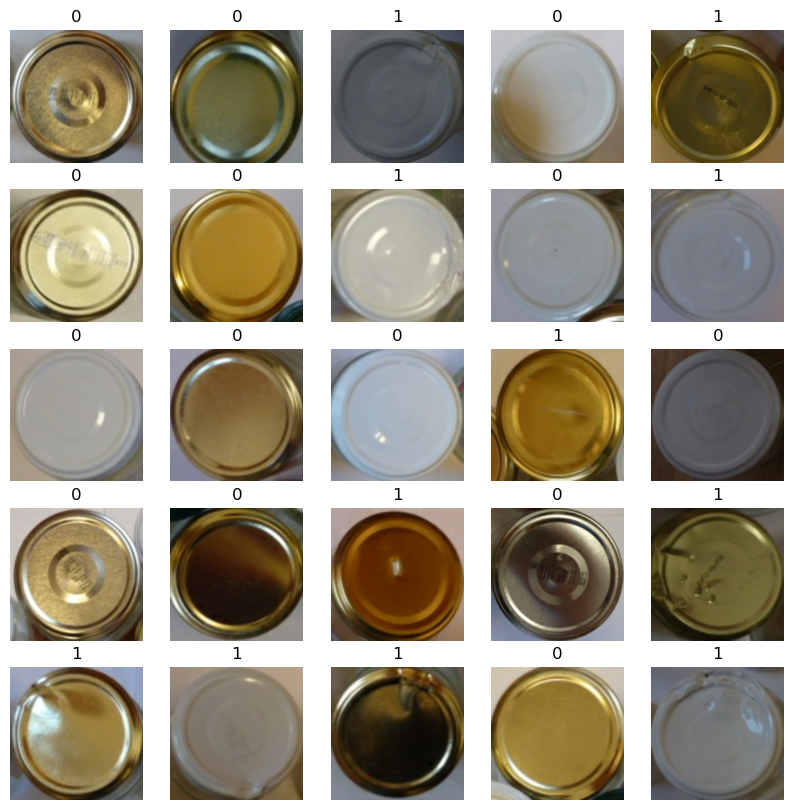

In [21]:
# Now lets visualise the data in the training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [22]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, color channels

# Setup output shape of oue model
OUTPUT_SHAPE = len(unique_labels)

# Setup model URL from tensorflow HUB

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5"

In [28]:
from tensorflow.python.keras import regularizers
# create a function which builds the model using the keras API
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", model_url)

  # setup the model layers
  model = tf.keras.Sequential([hub.KerasLayer(model_url), # layer 1 (input layer)
                               tf.keras.layers.Dropout(0.3),
                               tf.keras.layers.Dense(units=output_shape,activation="sigmoid"), # output layer
                               ])
  
  # compile the model
  model.compile(
      loss=tf.losses.BinaryCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # build the model
  model.build(input_shape)

  return model

In [29]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1664)              3766048   
                                                                 
 dropout_1 (Dropout)         (None, 1664)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 3330      
                                                                 
Total params: 3,769,378
Trainable params: 3,330
Non-trainable params: 3,766,048
_________________________________________________________________


In [30]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [31]:
import datetime
# create a function to build a TensorBoard call back
def create_tensorboard_callback():
  # create a log directory for storing TensorBoard logs
  logdir = os.path.join("C:/Users/Ritvik/Documents/ML/mplogs/",
                        # Make it so the logs are tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [32]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [181]:
NUM_EPOCHS = 20
# build a function to train and return the trained model
def train_model(url=MODEL_URL):
  """
  Trains a given model and reurns the trained model
  """
  # create a model
  model = create_model(INPUT_SHAPE, OUTPUT_SHAPE, url)

  # create new TesnorBoard session everytime we train our model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit (x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[tensorboard]
            )
  return model

In [182]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5
Epoch 1/20
35/35 [==============================] - 27s 685ms/step - loss: 0.6659 - accuracy: 0.6323 - val_loss: 0.4762 - val_accuracy: 0.8387
Epoch 2/20
35/35 [==============================] - 23s 665ms/step - loss: 0.4338 - accuracy: 0.8188 - val_loss: 0.3760 - val_accuracy: 0.8710
Epoch 3/20
35/35 [==============================] - 23s 665ms/step - loss: 0.3868 - accuracy: 0.8511 - val_loss: 0.3344 - val_accuracy: 0.8710
Epoch 4/20
35/35 [==============================] - 24s 685ms/step - loss: 0.3412 - accuracy: 0.8726 - val_loss: 0.3167 - val_accuracy: 0.8817
Epoch 5/20
35/35 [==============================] - 26s 751ms/step - loss: 0.3096 - accuracy: 0.8816 - val_loss: 0.2887 - val_accuracy: 0.8817
Epoch 6/20
35/35 [==============================] - 28s 792ms/step - loss: 0.2933 - accuracy: 0.8897 - val_loss: 0.2820 - val_accuracy: 0.8898
Epoch 7/20
35/35 [==============================]

In [183]:
# Epoch vs accuracy and loss on training set
Accuracy_mob = model.history.history['accuracy']
loss_mob = model.history.history['loss']
Accuracy_mob_val = model.history.history['val_accuracy']
loss_mob_val = model.history.history['val_loss']
Epochs= range(1,21)

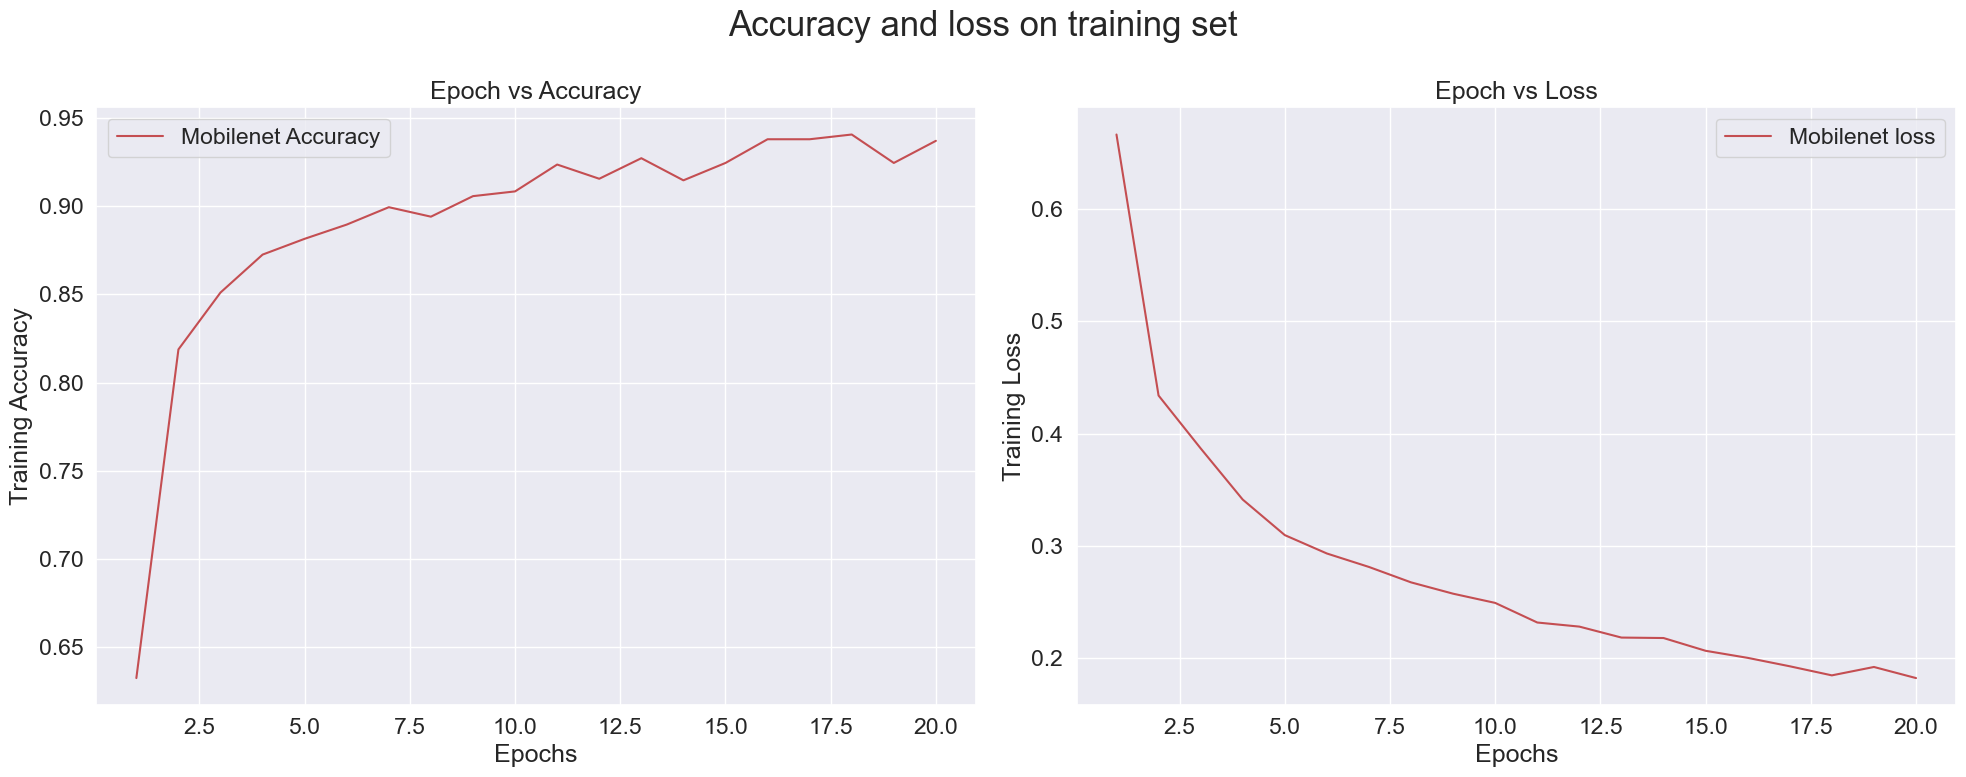

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
axes[0].plot(Epochs,Accuracy_mob,'r',label = 'Mobilenet Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training Accuracy')
axes[0].set_title('Epoch vs Accuracy')
axes[0].legend()
axes[1].plot(Epochs,loss_mob,'r',label = 'Mobilenet loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Training Loss')
axes[1].set_title('Epoch vs Loss')
axes[1].legend()
plt.suptitle('Accuracy and loss on training set',fontsize = 25)
plt.tight_layout()

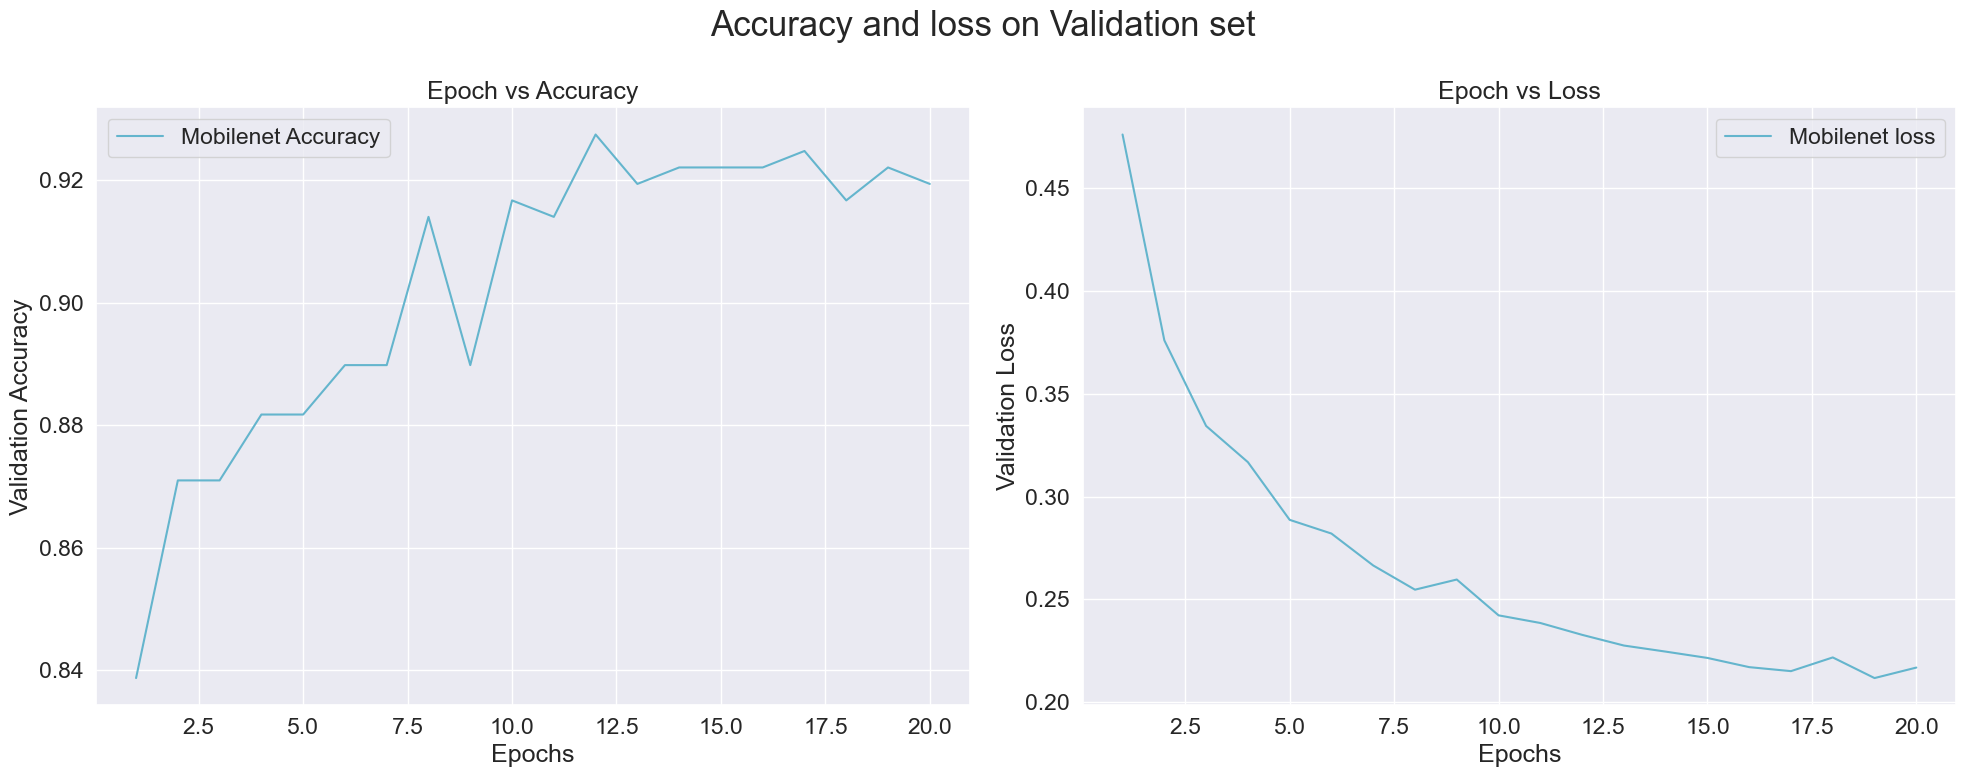

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
axes[0].plot(Epochs,Accuracy_mob_val,'c',label = 'Mobilenet Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Validation Accuracy')
axes[0].set_title('Epoch vs Accuracy')
axes[0].legend()
axes[1].plot(Epochs,loss_mob_val,'c',label = 'Mobilenet loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss')
axes[1].set_title('Epoch vs Loss')
axes[1].legend()
plt.suptitle('Accuracy and loss on Validation set',fontsize = 25)
plt.tight_layout()

In [186]:
# Make predictions on validation data (not used to train), i.e. getting prediction array
prediction = model.predict(val_data,verbose=1)
prediction

12/12 [==============================] - 6s 455ms/step


array([[2.58008819e-02, 9.71839070e-01],
       [7.67097473e-01, 2.12993264e-01],
       [9.43631947e-01, 5.07038496e-02],
       [2.49573290e-01, 7.57624269e-01],
       [9.46608186e-01, 4.13372070e-02],
       [9.42651423e-06, 9.99971390e-01],
       [1.33683684e-03, 9.99159217e-01],
       [8.88016582e-01, 1.01396531e-01],
       [9.94356215e-01, 6.34617591e-03],
       [9.95422423e-01, 7.60173565e-03],
       [9.91911530e-01, 6.38981070e-03],
       [9.70251620e-01, 2.67716665e-02],
       [1.04019362e-02, 9.89681661e-01],
       [5.85953370e-02, 9.26517069e-01],
       [2.82653980e-02, 9.69821453e-01],
       [2.35125050e-01, 7.39427984e-01],
       [7.79290050e-02, 9.44416642e-01],
       [1.50835618e-01, 8.64099801e-01],
       [9.84371483e-01, 2.17544883e-02],
       [9.49318290e-01, 4.39928658e-02],
       [9.84108865e-01, 1.47245871e-02],
       [2.77294265e-03, 9.96509969e-01],
       [6.89220987e-03, 9.86541569e-01],
       [2.03818381e-01, 7.59866118e-01],
       [9.819155

In [187]:
def get_pred_labels(prediction_probabilities):
  """
  Turns an array of prediction probabilities into labels
  """
  Label=[]
  for i in range(len(prediction_probabilities)):
    if (len(prediction_probabilities) == 2):
      Label = (unique_labels[np.argmax(prediction_probabilities)])
    else:
      Label.append(unique_labels[np.argmax(prediction_probabilities[i])])
  return Label

pred_label = get_pred_labels(prediction[10])
pred_label

0

In [188]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image,label) Tensors and returns separate 
  arrays of images and labels
  """
  images = []
  labels = []
  # loop through batched data 
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_labels[np.argmax(label)])
  return images, labels

# Unbatchify the validation data 
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.4039216 , 0.3921569 , 0.45882356],
         [0.40437678, 0.39261207, 0.45927873],
         [0.40598744, 0.39422274, 0.4608894 ],
         ...,
         [0.3859595 , 0.3585085 , 0.2957634 ],
         [0.39079142, 0.3633404 , 0.3005953 ],
         [0.3921569 , 0.3647059 , 0.3019608 ]],
 
        [[0.40344015, 0.39167544, 0.4583421 ],
         [0.40389532, 0.3921306 , 0.45879728],
         [0.40550599, 0.39374128, 0.46040794],
         ...,
         [0.38550386, 0.35805285, 0.29530776],
         [0.3899403 , 0.36248928, 0.2997442 ],
         [0.39119402, 0.363743  , 0.3009979 ]],
 
        [[0.40181202, 0.3900473 , 0.45671397],
         [0.4022672 , 0.39050248, 0.45716915],
         [0.40387785, 0.39211315, 0.4587798 ],
         ...,
         [0.3839629 , 0.3565119 , 0.2937668 ],
         [0.38706192, 0.35961092, 0.29686582],
         [0.38793772, 0.36048672, 0.29774162]],
 
        ...,
 
        [[0.45279238, 0.44494924, 0.4880865 ],
         [0.4523372 , 0.44449407, 0.48763

In [189]:
def plot_pred (prediction_probabilities, labels, images, n=1):
  """
  view the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  # Get the pred label
  pred_label = get_pred_labels(pred_prob)

  # Plot image and removal ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depenedning on if the prediction is right or wrong

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"


  # Change plot title to be predicted label, probability of prediction and truth label.
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)

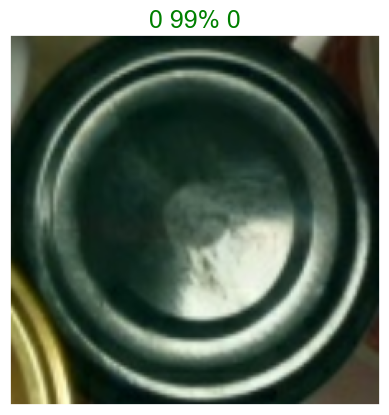

In [190]:
plot_pred(prediction_probabilities=prediction,
          labels=val_labels,
          images=val_images,
          n=10)

In [191]:
len(x_test), len(y_test)

(372, 372)

In [192]:
test_data = create_data_batches(x_test, y_test, test_data=True)

In [193]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [194]:
# make prediction on test data batch using model
test_prediction_mobile = model.predict(test_data,
                                     verbose=1)

12/12 [==============================] - 6s 442ms/step


In [195]:
print(test_prediction_mobile)

[[9.97607768e-01 2.13990104e-03]
 [9.77899492e-01 2.78672650e-02]
 [1.20871261e-01 8.82534683e-01]
 [9.58632231e-01 3.50014307e-02]
 [6.52903840e-02 9.51963603e-01]
 [7.32310951e-01 2.24460974e-01]
 [8.87318492e-01 1.24050364e-01]
 [8.85004401e-01 1.03842169e-01]
 [3.49236280e-02 9.56642270e-01]
 [4.61819649e-01 4.94919926e-01]
 [9.43491161e-01 4.32495959e-02]
 [9.19597685e-01 7.48794675e-02]
 [3.98086710e-03 9.96273100e-01]
 [3.80497836e-02 9.55265820e-01]
 [5.72933018e-01 5.08790612e-01]
 [7.94087112e-01 2.24057391e-01]
 [9.32178497e-01 4.78789583e-02]
 [3.28716543e-03 9.97350156e-01]
 [2.32080836e-02 9.75643992e-01]
 [9.07045662e-01 5.32182790e-02]
 [9.11652267e-01 9.14063379e-02]
 [9.14305747e-01 7.60233775e-02]
 [8.90958369e-01 8.99303928e-02]
 [9.70401525e-01 2.37251204e-02]
 [9.12326694e-01 1.27943441e-01]
 [8.42595100e-02 9.14350748e-01]
 [6.30652547e-01 3.40215385e-01]
 [9.05098736e-01 8.64608437e-02]
 [2.90518766e-03 9.93114352e-01]
 [4.11761896e-04 9.99278367e-01]
 [9.785842

In [196]:
test_labels_result_mobile = get_pred_labels(test_prediction_mobile)

In [197]:
Test_labels_final_mobile = [label == unique_labels for label in test_labels_result_mobile]


In [198]:
# Function to get mask or no mask label
def numbered_result (Labels):
    for i in range(len(Labels)):
        if Labels[i][0] == False:
            Labels[i] = 0
        else :
            Labels[i] = 1

In [199]:
y_test

[1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,


In [200]:
#numbered_result(y_test)
numbered_result(Test_labels_final_mobile)

In [201]:
y_test

[1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,


In [202]:
Test_labels_final_mobile

[1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,


In [203]:
accuracy_score(y_test, Test_labels_final_mobile)

0.8951612903225806

In [204]:
# Confusion metrics
confusion_matrix (y_test, Test_labels_final_mobile)

array([[150,  24],
       [ 15, 183]], dtype=int64)

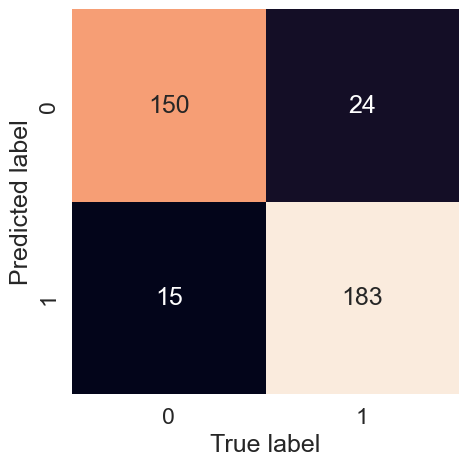

In [205]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots and a nice looking confusionmatrix using s
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,Test_labels_final_mobile)

In [206]:
report=classification_report(y_test, Test_labels_final_mobile,output_dict=True)
report

{'0': {'precision': 0.9090909090909091,
  'recall': 0.8620689655172413,
  'f1-score': 0.8849557522123893,
  'support': 174},
 '1': {'precision': 0.8840579710144928,
  'recall': 0.9242424242424242,
  'f1-score': 0.9037037037037037,
  'support': 198},
 'accuracy': 0.8951612903225806,
 'macro avg': {'precision': 0.8965744400527009,
  'recall': 0.8931556948798327,
  'f1-score': 0.8943297279580464,
  'support': 372},
 'weighted avg': {'precision': 0.8957669259212037,
  'recall': 0.8951612903225806,
  'f1-score': 0.8949345005867986,
  'support': 372}}

In [207]:
df1 = pd.DataFrame(report).transpose()
df1=df1.drop(columns=['support'])
df1=df1.drop(['macro avg','weighted avg'])
df1.index = ['No Mask','Mask','Accuracy']
df1

,precision,recall,f1-score
No Mask,0.909091,0.862069,0.884956
Mask,0.884058,0.924242,0.903704
Accuracy,0.895161,0.895161,0.895161


In [208]:
def pd_to_image(pdf,name):
    df_styled = pdf.style.background_gradient()
    dfi.export(df_styled,name+".png")
pd_to_image(df1,"Table_1")

In [209]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open("tflite_model.tflite", "wb").write(converted_tflite_model)

14901204

In [210]:
# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open("tflite_model_quant.tflite", "wb").write(tflite_quant_model)

4128640

In [4]:
# Load TFLite model and see some details about input/output

interpreter = tf.lite.Interpreter(model_path="tflite_model.tflite")

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: x
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [1 2]
type: <class 'numpy.float32'>


In [212]:
haar_data = cv2.CascadeClassifier('D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/cascade1.xml')
capture = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
txt = 'undamaged'
prev_label = 0
pTime=0
fps_sum=0
avg_fps_haar_mob=0
counts=1
while True:
    flag, img = capture.read()
    cTime=time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime
    fps_sum=fps_sum+fps
    avg_fps_haar_mob=fps_sum/counts
    counts=1+counts
    filename = 'D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/frames/frame.jpg'
    X = ['D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/frames/frame.jpg']
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w, y+h),(255,255,0),1)
            faces = img[y:y + h, x:x + w]
            cv2.imwrite(filename, faces)
            data_batch = create_data_batches(X, test_data = True)
            pred = model.predict(data_batch)
            label = np.argmax(pred)
            if label != prev_label:
                print(label)
                prev_label = label
            
            if label == 0:
                out = 'no damage'
            elif label == 1:
                out = 'damage'
            cv2.putText(img, f'FPS: {int(fps)}',(550,20),font,0.6,(255,255,255),1)
            cv2.putText(img, out, (x, y-10),font,0.6,(255,255,255),1)
        cv2.imshow('Result',img)
        if cv2.waitKey(2) == 27:
            break
capture.release()
cv2.destroyAllWindows()

In [213]:
cv2.__version__

'4.7.0'

In [5]:
haar_data = cv2.CascadeClassifier('D:/My Work/Mechatronics/8th Sem. PPTs and Notes/Models/Quality Assurance/cascade1.xml')

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.allocate_tensors()

# input details
print(input_details)
# output details
print(output_details)

# resize the input tensor
interpreter.resize_tensor_input(input_details[0]['index'],[1, 224, 224, 3])
interpreter.allocate_tensors()

capture = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
pTime=0
prev_label =0
fps_sum=0
avg_fps_haar_mob=0
counts=1
while True:
    flag, img = capture.read()
    cTime=time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime
    fps_sum=fps_sum+fps
    avg_fps_haar_mob=fps_sum/counts
    counts=1+counts
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w, y+h),(255,255,0),1)
            faces = img[y:y + h, x:x + w]
            images = []
            new_img = cv2.resize(faces, (224, 224),interpolation = cv2.INTER_CUBIC)
            new_img = new_img.astype(np.float32)
            new_img /= 255
            images.append(new_img)
            print('list append')
            interpreter.set_tensor(input_details[0]['index'], images)
            # run the inference
            print('tensor set')
            interpreter.invoke()
            # output_details[0]['index'] = the index which provides the input
            print('output found')
            output_data = interpreter.get_tensor(output_details[0]['index'])
            print(output_data)
            label = np.argmax(output_data)
            if label != prev_label:
                print(label)
                prev_label=label
            cv2.putText(img, f'FPS: {int(fps)}',(550,20),font,0.6,(255,255,255),1)
            if label == 0:
                out = 'no damage'
            elif label == 1:
                out = 'damage'
            cv2.putText(img, out, (x, y-10),font,0.6,(255,255,255),1)
        cv2.imshow('Result',img)
        if cv2.waitKey(2) == 27:
            break
capture.release()
cv2.destroyAllWindows()

[{'name': 'x', 'index': 0, 'shape': array([  1, 224, 224,   3]), 'shape_signature': array([ -1, 224, 224,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'Identity', 'index': 177, 'shape': array([1, 2]), 'shape_signature': array([-1,  2]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
list append
tensor set
output found
[[0.00238512 0.9583495 ]]
1
list append
tensor set
output found
[[8.634872e-04 9.856757e-01]]
list append
tensor set
output found
[[6.4497959e-04 9.8768485e-01]]
list append
tensor set
output found
[[0.00111719 0.97978127]]
list append
tensor set
output found
[[0.0028962  0.95925355]]
list append
tensor set
output fou

list append
tensor set
output found
[[3.8043107e-04 9.9311590e-01]]
list append
tensor set
output found
[[0.6932996  0.45004874]]
0
list append
tensor set
output found
[[0.7156662  0.27212563]]
list append
tensor set
output found
[[0.5944234  0.42446962]]
list append
tensor set
output found
[[0.49608648 0.44409642]]
list append
tensor set
output found
[[0.711422   0.37586623]]
list append
tensor set
output found
[[0.896703   0.10320728]]
list append
tensor set
output found
[[0.9317014  0.09970734]]
list append
tensor set
output found
[[0.8590093  0.16314435]]
list append
tensor set
output found
[[0.94296944 0.06723836]]
list append
tensor set
output found
[[0.93614334 0.08907555]]
list append
tensor set
output found
[[0.9001131  0.15001197]]
list append
tensor set
output found
[[0.95432603 0.04748583]]
list append
tensor set
output found
[[0.8990747  0.18639445]]
list append
tensor set
output found
[[0.95985866 0.0531877 ]]
list append
tensor set
output found
[[0.8767266 0.126458 ]]
li

list append
tensor set
output found
[[0.7763499  0.34114745]]
0
list append
tensor set
output found
[[0.6221851  0.44311136]]
list append
tensor set
output found
[[0.52155817 0.6267488 ]]
1
list append
tensor set
output found
[[0.58217007 0.4363614 ]]
0
list append
tensor set
output found
[[0.80758524 0.32062766]]
list append
tensor set
output found
[[0.73700833 0.3601219 ]]
list append
tensor set
output found
[[0.5247668  0.58290386]]
1
list append
tensor set
output found
[[0.6795939  0.36217272]]
0
list append
tensor set
output found
[[0.30053607 0.52510464]]
1
list append
tensor set
output found
[[0.01538309 0.94035363]]
list append
tensor set
output found
[[0.00280947 0.9917094 ]]
list append
tensor set
output found
[[6.4537185e-04 9.9862361e-01]]
list append
tensor set
output found
[[5.7835825e-04 9.9803084e-01]]
list append
tensor set
output found
[[0.19391568 0.84840125]]
list append
tensor set
output found
[[0.7730553 0.2665447]]
0
list append
tensor set
output found
[[2.647636